In [74]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import diff,dsolve,simplify,Function,I,Equality

In [75]:
ra = Function('a')
rb = Function('b')
rad = Function('ad')
rbd = Function('bd')

a = Function('a')
b = Function('b')
ada = Function('ada')
bdb = Function('bdb')
adb = Function('adb')



omega = sp.Symbol('omega',real=True,positive=True)
omegaL = sp.Symbol('omega_L',real=True,positive=True)
Epsilon = sp.Symbol('Epsilon',real=True,positive=True)
kappa_a,kappa_b = sp.symbols('kappa_a,kappa_b',real=True,positive=True)

mu = sp.Symbol('mu',real=False)
Gamma = sp.Symbol('Gamma',real=True,positive=True)
J = sp.Symbol('J',real=False)
Lambda_a = sp.Symbol('Lambda_a',real=True,positive=True)
Lambda_b = sp.Symbol('Lambda_b',real=True,positive=True)
t = sp.Symbol('t',real=True)

In [134]:
#======================================= 这个是给互易条件下的众多符号赋值 ==================================
omega_val = 1
omegaL_val= omega_val
J_val = 0.02*omega_val
Epsilon_val = 0.1*omega_val
kappa_val = 0.003*omega_val
def subs_rmy(sym):
    return sym.subs({
        omega:omega_val,omegaL:omegaL_val,
        J:J_val,Epsilon:Epsilon_val,
        kappa_a:kappa_val,kappa_b:kappa_val
    })
#====================================== 下面给非互易情况下的众多符号赋值 ===================================
Gamma_val = 0.04*omega_val
Lambda_val = Gamma_val+kappa_val

def subs_nrmy(eq):
    return eq.subs({
        Lambda_a:Lambda_val,Lambda_b:Lambda_val,
        mu:I,Gamma:Gamma_val,Epsilon:Epsilon_val,
        omega:omega_val,omegaL:omegaL_val
    })

In [135]:
#=====================================  互易条件下的方程 ==================================================
req1 = Equality(diff(ra(t),t,1),-(kappa_a/2+I*omega)*ra(t)-I*J*rb(t)-I*Epsilon*sp.exp(-I*omegaL*t))
req2 = Equality(diff(rb(t),t,1),-(kappa_b/2+I*omega)*rb(t)-I*sp.conjugate(J)*ra(t))
req3 = Equality(diff(rad(t),t,1),(-kappa_a/2+I*omega)*rad(t)+I*sp.conjugate(J)*rbd(t)+I*Epsilon*sp.exp(I*omegaL*t))
req4 = Equality(diff(rbd(t),t,1),(-kappa_b/2+I*omega)*rbd(t)+I*J*rad(t))
# 开始进行替换
req1 = subs_rmy(req1)
req2 = subs_rmy(req2)
req3 = subs_rmy(req3)
req4 = subs_rmy(req4)
# 求解方程
r1 = dsolve([req1,req2],ics={ra(0):0,rb(0):0})
r2 = dsolve([req3,req4],ics={rad(0):0,rbd(0):0})
# 计算互易条件下的电池能量
rbdb = r1[1].rhs*r2[1].rhs

In [136]:
#===================================    非互易条件下的方程====================================================
nreq1 = Equality(diff(a(t),t,1),-(Lambda_a/2+I*omega)*a(t)-I*Epsilon*sp.exp(-I*omegaL*t))
nreq2 = Equality(diff(b(t),t,1),-(Lambda_b/2+I*omega)*b(t)+sp.conjugate(mu)*Gamma*a(t))

nreq1 = subs_nrmy(nreq1)
nreq2 = subs_nrmy(nreq2)
nrr1 = dsolve([nreq1,nreq2],ics={a(0):0,b(0):0})

In [137]:
nrrb = nrr1[1].rhs
nrra = nrr1[0].rhs
nrrb

0.186046511627907*t*exp(-t*(0.0215 + 1.0*I)) + 8.65332612222823*exp(-t*(0.0215 + 1.0*I)) - 8.65332612222823*exp(-1.0*I*t)

In [138]:
nreq3 = Equality(diff(ada(t),t,1),-Lambda_a*ada(t)-2*sp.im(sp.exp(I*omegaL*t)*Epsilon*nrra))
nreq3 = subs_nrmy(nreq3)
# 获取计算结果
nrada = dsolve(nreq3,ics={ada(0):0}).rhs
nrada

21.6333153055706 + 21.6333153055706*exp(-0.043*t) - 43.2666306111412*exp(-0.0215*t)

In [139]:
# 剩下的方程
nreq4 = Equality(diff(bdb(t),t,1),-Lambda_b*bdb(t)+2*sp.re(mu*Gamma*adb(t)))
nreq5 = Equality(diff(adb(t),t,1),-(Lambda_a+Lambda_b)/2*adb(t)\
        +sp.conjugate(mu)*Gamma*nrada+I*Epsilon*sp.exp(I*omegaL*t)*nrrb)

nreq4 = subs_nrmy(nreq4)
nreq5 = subs_nrmy(nreq5)

In [140]:
# 计算微分方程组
nrr2 = dsolve([nreq4,nreq5],ics={bdb(0):0,adb(0):0})

nrbdb = nrr2[0].rhs

C:\Users\82271\AppData\Local\Temp\ipykernel_9644\1831030454.py:16: RuntimeWarning: divide by zero encountered in divide
  ax[1].plot(J_val*tlist,nr/(r),'r',label=r"$\eta_{BB}(t)$")


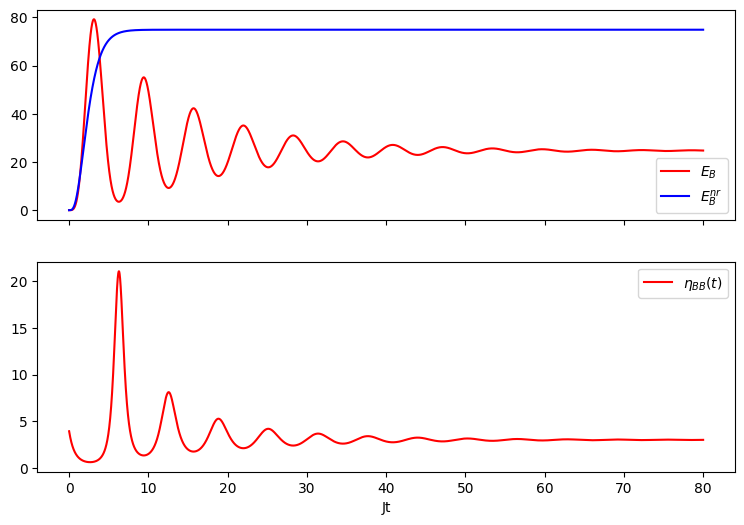

In [141]:
# 开始画图
rbdbf = sp.lambdify(t,rbdb,'numpy')
nrbdbf = sp.lambdify(t,nrbdb,'numpy')
tlist = np.linspace(0,4000,8000)
r = np.real(rbdbf(tlist))
nr = np.real(nrbdbf(tlist))
# 开始画图

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(9,6),sharex=True)
ax[0].plot(J_val*tlist,r,'r',label=r'$E_B$')
ax[0].plot(J_val*tlist,nr,'b',label=r'$E_B^{nr}$')
# # ax[0].set_yticks([0,40,80],['0','40','80'])
ax[0].legend()

# 画第二个图
ax[1].plot(J_val*tlist,nr/(r),'r',label=r"$\eta_{BB}(t)$")
ax[1].legend()
ax[1].set_xlabel('Jt')
# ax[1].set_xticks([0,20,40,60,80],['0','20','40','60','80'])
# ax[1].set_yticks([0,10,20],['0','10','20'])
plt.show()